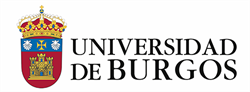
# Práctica 5 - Algoritmos Divide y Vencerás
## Algoritmia - Grado en Ingeniería Informática - Universidad de Burgos

Tras completar con éxito la primera fase de la colonización, en la que los pioneros de *Teegarden b* establecieron una red básica de comunicación que conectó de forma óptima todos los sectores de la colonia, se abre un nuevo capítulo en nuestra épica aventura interplanetaria.

Con la infraestructura esencial ya consolidada, los colonos se enfrentan ahora a desafíos internos de gran envergadura. La vida en el exoplaneta demanda una gestión eficiente de los recursos energéticos. 

### Problemas a resolver

1. **Ordenar los sectores de la colonia**  
   Cada sector posee características propias, como el número de colonos, su antigüedad, el coste energético de operación y la producción energética. Se requiere desarrollar un método eficiente basado en Divide y Vencerás para ordenar los sectores según un criterio elegido (por ejemplo, por antigüedad o por número de colonos).
   

2. **Determinar el mejor Intervalo de producción energética neta**  
   Los colonos necesitan conocer cuál es el mejor periodo del mes para llevar a cabo experimentos con un alto consumo energético.
   Conocen la producción energética de cada sector en cada hora del mes (asumimos 720 horas en un mes) y su coste de operación por hora. Se debe encontrar el intervalo consecutivo de horas del mes en que la producción neta de la colonia en su conjunto (producción menos coste) sea máxima. 
   
   Considera que:
   * En determinadas horas la producción neta de algunos sectores puede ser negativa.
   * Desconocemos de antemano la longitud del intervalo de producción máxima de la colonia.
   
   Se pide implementar dos versiones de la solución:
   
    __Versión A de la solución__: Resolver el problema empleando un enfoque divide y vencerás directo: dividir la serie, resolver recursivamente, combinar los resultados. Ten en cuenta: si dividimos la serie temporal de producción neta de energía en dos mitades, tenemos que:
   * El intervalo óptimo se encuentra completamente en la parte izquierda, o bien
   * el intervalo óptimo se encuentra completamente en la parte derecha, o bien
   * el intervalo óptimo cruza el centro.
    
    __Versión B de la solución__: La fase de combinación de la versión anterior condiciona la complejidad temporal del algoritmo. En la versión B se devolverá información adicional sobre el segmento que se está procesando en cada llamada recursiva:
    * Suma total del segmento.
    * Suma máxima de un subsegmento que comienza en el primer elemento.
    * Suma máxima de un subsegmento que termina en el último elemento.
    * Suma máxima de cualquier subsegmento dentro del segmento.
    
    Debe utilizarse esta información para mejorar la complejidad asintótica de la combinación de soluciones.

Los alumnos deberán estudiar y proponer métodos eficientes para resolver ambos problemas. Se proporcionan implementaciones básicas de las clases SectorColonia y Colonia, cuyas instancias representarán los objetos básicos a manipular en esta práctica.


### Entregables

* Completar sobre este mismo notebook las __funciones indicadas con _pass___, con el fin de __resolver los problemas planteados. (6 puntos de 10)__
* Responder a las __preguntas planteadas__ en la siguiente celda, sobre el mismo notebook __(4 puntos de 10)__
  
Entregar el archivo resultate con el siguiente formato:

    <primer-apellido>_<segundo-apellido>_P05.ipynb

Por ejemplo, _seto\_rey\_P05.ipynb_

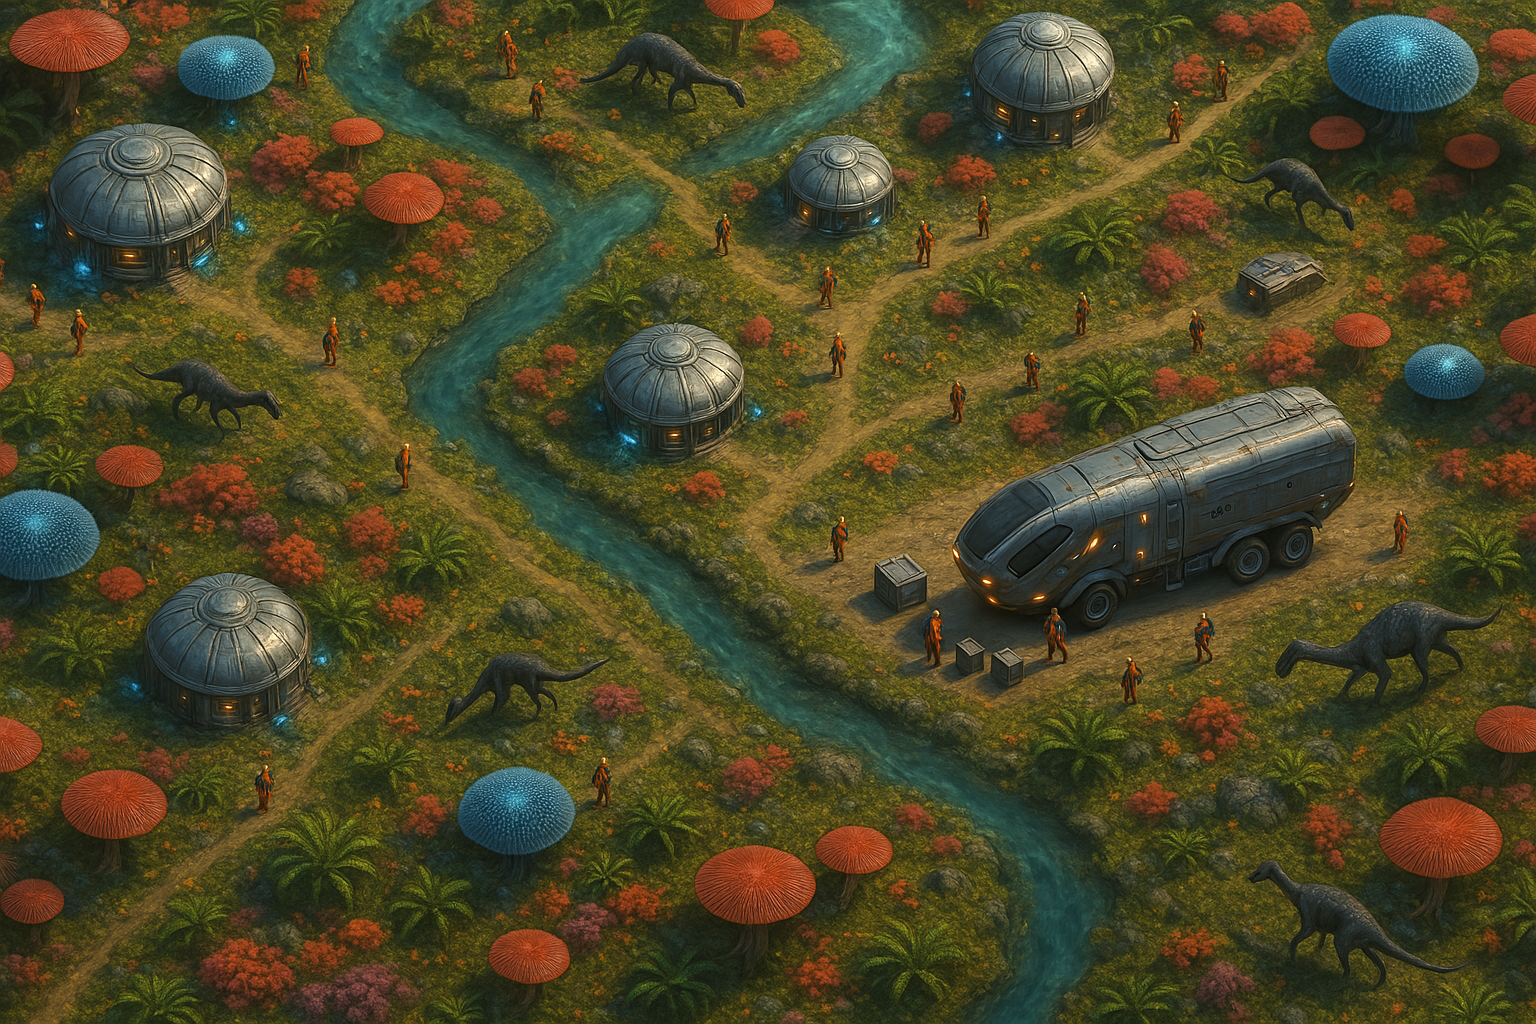

### Cuestiones
Responder a las siguientes preguntas __una vez resuelta la implementación__.

1. Analiza la complejidad temporal y espacial de las soluciones propuestas; en el caso del problema 2 incluyendo ambas versiones de la solución (2 puntos)
2. Describe qué posibles problemas podrían surgir al aplicar los métodos propuestos en la práctica. (1 punto)
3. Considerando tu experiencia personal, describe que aspectos te han resultado más complejos a la hora de abordar esta práctica y qué recursos has empleado para afrontarlos (1 punto) 


In [361]:
class SectorColonia:
    """
    Modelo de un sector de la colonia en el exoplaneta.

    Atributos:
      - num_colonos: Número de colonos en el sector.
      - antiguedad: Antigüedad del sector en años.
      - coste_energetico: Coste energético de operación por hora.
      - produccion_horaria: Lista de producción energética para cada hora del mes (720 horas).
    """
    def __init__(self, num_colonos, antiguedad, coste_energetico, produccion_horaria):
        self.num_colonos = num_colonos
        self.antiguedad = antiguedad
        self.coste_energetico = coste_energetico
        self.produccion_horaria = produccion_horaria

    def neto_horario(self):
        """Retorna la producción neta por hora del sector (producción menos coste)."""
        neto_sector = ()
        for elemento in self.produccion_horaria:
            neto_sector.append(elemento-coste_energetico)
        print(neto_sector)
        return neto_sector
    
    def __repr__(self):
        return f"Sector(num={self.num_colonos}, antig={self.antiguedad}, coste={self.coste_energetico})"


class Colonia:
    """
    Modelo de la colonia en el exoplaneta, compuesta por una lista de sectores.
    """
    def __init__(self, *sectores):
        """
        Permite inicializar la colonia pasando:
          - Una lista de sectores: ej. Colonia([sector1, sector2, ...])
          - O varios argumentos: ej. Colonia(sector1, sector2, ...)
        """
        if len(sectores) == 1 and isinstance(sectores[0], list):
            self.sectores = sectores[0]
        else:
            self.sectores = list(sectores)
    
    def agregar_sector(self, sector: SectorColonia):
        self.sectores.append(sector)
    
    def produccion_neta_colonia(self):
        """
        Calcula la producción energética neta de la colonia para cada hora del mes.
        Retorna una lista de 720 valores, sumando para cada hora la producción neta de cada sector.
        """
        res=[]
        if not self.sectores:
            return res
            
        res = [0]*720
        
        for sec in self.sectores:
            for n in range(720):
                res[n]+=sec.produccion_horaria[n]-sec.coste_energetico
        return res


In [363]:
def ordenar_sectores(sectores, key_func):
    """
    Ordena la lista de sectores según la clave definida por key_func.
    
    Parámetros:
      - sectores: Lista de SectorColonia.
      - key_func: Función que recibe un sector y retorna el valor de la clave para comparar.
      
    Retorna una lista de sectores ordenados.
    """
    pass

In [365]:
def maximo_intervalo_produccion_a(colonia: Colonia):
    """
    Dado un objeto Colonia, utiliza un enfoque Divide y Vencerás para determinar
    el intervalo consecutivo de horas en el que la producción neta (producción menos coste)
    es máxima.
    
    Retorna una tupla (suma_max, inicio, fin).
    """
    pass

def maximo_intervalo_produccion_b(colonia: Colonia):
    """
    Dado un objeto Colonia, utiliza una versión optimizada (generando información extra en cada llamada recursiva)
    para determinar el intervalo consecutivo de horas en el que la producción neta es máxima.
    
    Retorna una tupla (total, pref, suf, mejor, inicio, fin), donde 'mejor' es la suma máxima del intervalo y
    (inicio, fin) son los índices del mismo.
    """
    pass

# Tests

A continuación se proporcionan una estructura básica de test para comprobar la funcionalidad implementada

__IMPORTANTE: Los test proporcionados no son exhaustivos y se incluyen únicamente a modo de ejemplo.__ 

Superar estos tests no implica que la práctica está correctamente resuelta. Se recomienda que el alumno implemente tests adicionales con el fin de probar su implementación.

In [368]:
import unittest, random

class TestColoniaOptimizacion(unittest.TestCase):
    
    def setUp(self):
        # Crear una colonia de ejemplo con sectores generados aleatoriamente
        self.colonia = Colonia()
        random.seed(42)  # Para reproducibilidad
        for _ in range(8):
            sector = SectorColonia(
                num_colonos=random.randint(50,150),
                antiguedad=random.randint(1,10),
                coste_energetico=random.uniform(5,40),
                produccion_horaria=[random.uniform(0,60) for _ in range(720)]
            )
            self.colonia.agregar_sector(sector)
    
    def test_ordenar_sectores(self):
        # Ordenar los sectores por número de colonos
        sectores = self.colonia.sectores.copy()
        sectores_ordenados = ordenar_sectores(sectores, key_func=lambda s: s.num_colonos)
        for i in range(1, len(sectores_ordenados)):
            self.assertLessEqual(sectores_ordenados[i-1].num_colonos, sectores_ordenados[i].num_colonos)
   
    def test_maximo_intervalo_produccion(self):
        # Comparar los resultados de ambas versiones
        suma_max, inicio, fin = maximo_intervalo_produccion_a(self.colonia)
        _, _, _, mejor_b, inicio_b, fin_b = maximo_intervalo_produccion_b(self.colonia)
        self.assertAlmostEqual(suma_max, mejor_b, delta=1e-6,
                               msg="Ambas versiones deben obtener la misma máxima producción neta")
    
    def test_intervalo_indices(self):
        # Verificar que los índices del intervalo obtenido estén dentro del rango
        produccion = self.colonia.produccion_neta_colonia()
        _, _, _, _, inicio_b, fin_b = maximo_intervalo_produccion_b(self.colonia)
        self.assertGreaterEqual(inicio_b, 0)
        self.assertLessEqual(fin_b, len(produccion)-1)
        self.assertLessEqual(inicio_b, fin_b)
    
    def test_colonia_vacia(self):
        colonia_vacia = Colonia()
        self.assertEqual(colonia_vacia.produccion_neta_colonia(), [],
                         "Una colonia sin sectores debe retornar una lista vacía de producción neta")
if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

.EEE
ERROR: test_intervalo_indices (__main__.TestColoniaOptimizacion.test_intervalo_indices)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Temp\ipykernel_9924\3644846084.py", line 35, in test_intervalo_indices
    _, _, _, _, inicio_b, fin_b = maximo_intervalo_produccion_b(self.colonia)
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: cannot unpack non-iterable NoneType object

ERROR: test_maximo_intervalo_produccion (__main__.TestColoniaOptimizacion.test_maximo_intervalo_produccion)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Temp\ipykernel_9924\3644846084.py", line 27, in test_maximo_intervalo_produccion
    suma_max, inicio, fin = maximo_intervalo_produccion_a(self.colonia)
    ^^^^^^^^^^^^^^^^^^^^^
TypeError: cannot unpack non-iterable NoneType object

ERROR: test_ordenar_sectores (__main__.TestCo

720
